# Illustration: Implied Volatility & Volatility Smile & VIX Index


This jupyter notebook uses **Yahoo_fin** package (http://theautomatic.net/yahoo_fin-documentation/) to scrape market data from https://finance.yahoo.com.

Load required packages:

In [1]:
import numpy as np
import matplotlib.pylab as plt

import pandas as pd

import yahoo_fin.stock_info as si
from yahoo_fin import options

### Implied Volatility

Specify ticker: E.g., "AAPL" for Apple, "^SPX" for S&P 500 index, "TSLA" for Tesla etc. 


In [2]:
ticker = "AAPL" 

Get latest stock price:

In [3]:
s0 = si.get_live_price(ticker)
print("Current value of", ticker, ":", s0)

Current value of AAPL : 155.9600067138672


Get options data:

In [4]:
maturities = options.get_expiration_dates(ticker) ## get all the available maturities
print("List of avaiable maturities:", maturities)

List of avaiable maturities: ['September 9, 2022', 'September 16, 2022', 'September 23, 2022', 'September 30, 2022', 'October 7, 2022', 'October 14, 2022', 'October 21, 2022', 'November 18, 2022', 'December 16, 2022', 'January 20, 2023', 'February 17, 2023', 'March 17, 2023', 'April 21, 2023', 'June 16, 2023', 'July 21, 2023', 'September 15, 2023', 'January 19, 2024', 'June 21, 2024']


Choose a maturity $T$: 

In [5]:
T = maturities[2]
print(T)

September 23, 2022


Get call options:

In [6]:
callOptions = options.get_calls(ticker,T) ## get all available call options with matutity T

In [7]:
## Display all call options
pd.set_option("display.max_rows", None)
callOptions

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,AAPL220923C00070000,2022-09-06 3:29PM EDT,70.0,84.70,86.00,86.15,0.00,-,33,175,163.28%
1,AAPL220923C00075000,2022-09-06 2:53PM EDT,75.0,79.37,81.00,81.15,0.00,-,6,133,150.39%
2,AAPL220923C00080000,2022-09-06 2:00PM EDT,80.0,74.65,76.00,76.15,0.00,-,35,76,138.28%
3,AAPL220923C00085000,2022-09-06 11:35AM EDT,85.0,71.10,71.00,71.15,0.00,-,1,41,126.56%
4,AAPL220923C00090000,2022-09-01 11:16AM EDT,90.0,66.10,66.00,66.15,0.00,-,2,8,115.82%
5,AAPL220923C00095000,2022-09-06 3:59PM EDT,95.0,59.50,61.00,61.20,0.00,-,4,6,108.20%
6,AAPL220923C00100000,2022-09-01 10:25AM EDT,100.0,57.15,56.00,56.20,0.00,-,-,12,98.24%
7,AAPL220923C00105000,2022-08-29 2:19PM EDT,105.0,57.00,51.05,51.20,0.00,-,-,1,90.82%
8,AAPL220923C00110000,2022-09-06 10:53AM EDT,110.0,46.10,46.05,46.20,0.00,-,1,15,81.25%
9,AAPL220923C00115000,2022-08-26 10:01AM EDT,115.0,55.25,41.05,41.25,0.00,-,3,3,73.83%


Plot the implied volatilities as a function of $K/S_0$:

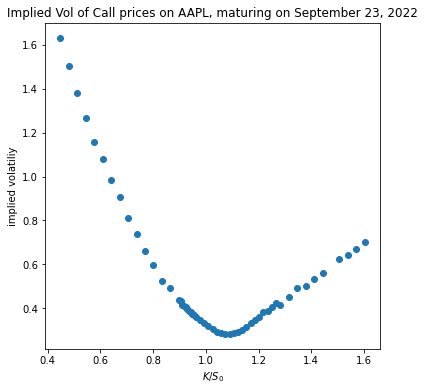

In [8]:
plt.figure(figsize=(6, 6))
plt.plot(callOptions['Strike']/s0, callOptions['Implied Volatility'].str.replace(r'%', '').astype(float) / 100., 'o')
#plt.plot(callOptions['Strike']/s0, callOptions['Implied Volatility'], 'o')
plt.title("Implied Vol of Call prices on {}, maturing on {}".format(ticker, T))
plt.xlabel("$K/S_0$")
plt.ylabel("implied volatiliy")
plt.savefig("impliedvol.pdf")
plt.show()

### The VIX Index

In [9]:
histData = si.get_data("^VIX", start_date = "01-01-2000")

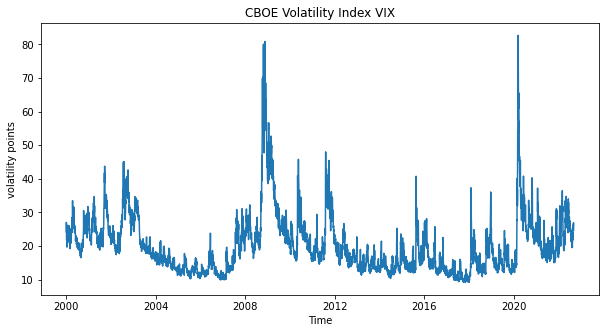

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(histData["close"])
plt.title("CBOE Volatility Index VIX")
plt.xlabel("Time")
plt.ylabel("volatility points")
plt.savefig("VIX.pdf")
plt.show()